# Gausova Kvadratura a Legendrovy polynomy

imports:

In [55]:
import Kvadratury as kv
from matplotlib import pyplot as plt
from matplotlib import colormaps
from matplotlib import colors
import numpy as np


# Legendre Polynomials

#### Legendre:

In [ ]:

n=15
t = np.linspace(-1, 1, 1000)
print(t.shape)
l = kv.legendre(t, 100)
plt.plot(t, l[n])

#### Normal Legendre:

In [ ]:
n=11
t = np.linspace(-1, 1, 1000)
print(t.shape)
l = kv.legendre_normal(t, 50)
plt.plot(t, l[n])

#### Legendre over interval (a,b):

In [ ]:
n=15
a = 0
b = 10
t = np.linspace(a, b, 1000)
print(t.shape)
l = kv.legendre_int(t, 50, a, b)
plt.plot(t, l[n])

#### Normal Legendre over interval (a,b):

In [ ]:
n=15
a = 0
b = 5
t = np.linspace(a, b, 1000)
print(t.shape)
l = kv.legendre_normal_int(t, 100, a, b)
plt.plot(t, l[n])

# Calculating integrals using Gauss Quadrature rule and a Jakobi matrix

In [ ]:
n=100
f = lambda x: x**2
fI = lambda x: x**3/3
Gq = kv.quadrature(f,n)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", fI(1)-fI(-1))
print("error:", Gq - (fI(1)-fI(-1)))

##### over interval (a,b)

In [2]:
n = 100
a = 10
b = 25
f = lambda x: np.sin(x)
fI = lambda x: -np.cos(x)
Gq = kv.quadrature_int(f, n, a, b)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", fI(b)-fI(a))
print("error:", Gq - (fI(b)-fI(a)))

Gauss-quadrature: -1.8302743409399347
actual value of integral: -1.830274340939926
error: -8.659739592076221e-15


## Konvergation graphs 

0.0


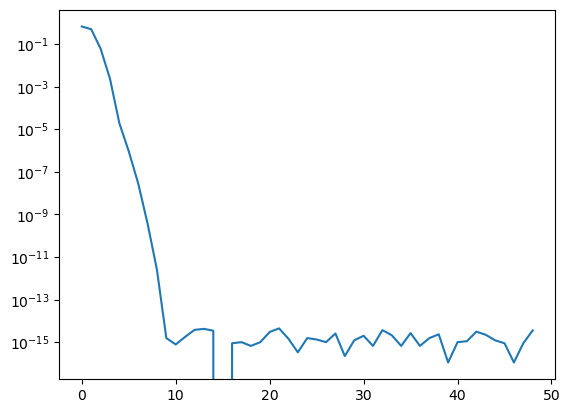

In [3]:
n = 50
def f(x): return np.exp(x)*np.sin(np.pi*x)
res = []
for i in range(1, n):
    res.append(abs(kv.quadrature(f, i) - 0.67932618340209469947815632370907306163177032877927709391270561911906360182))
plt.plot(res)
plt.yscale('log')
print(res[15])

In [ ]:
n=50
f = lambda x: x**30
fI = lambda x: x**31/31
res = []
for i in range(1, n):
    res.append(abs(kv.quadrature(f, i) - (fI(1)-fI(-1))))
plt.plot(res)
plt.yscale('log')

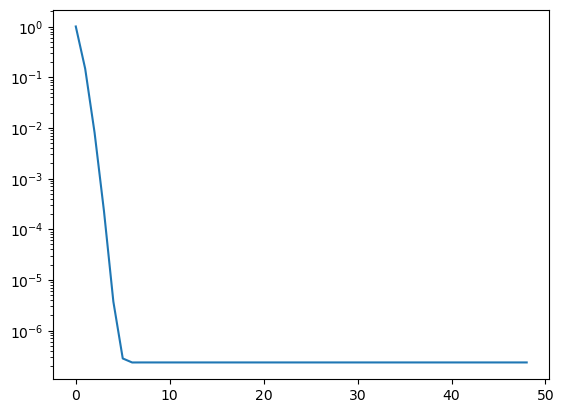

In [2]:
n=50
a = 5
b = 10
f = lambda x: np.sin(x)/np.log(5*x)
fI = 0.287556
res = []
for i in range(1, n):
    res.append(abs(kv.quadrature_int(f, i, a, b) - fI))
plt.plot(res)
plt.yscale('log')

over interval <a,b>

In [ ]:
n=50
f = lambda x: np.sin(x)

#### 2D polynomials:

(100, 120)
(100, 120)


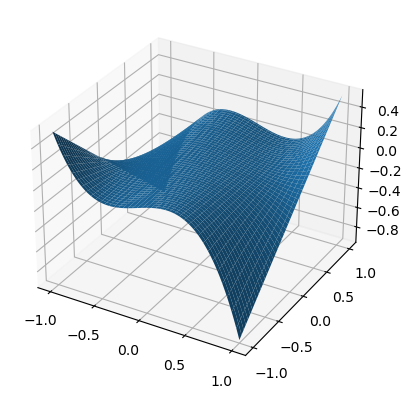

In [63]:
nx, ny = (120, 100)
a = -1
b = 1
c = -1
d = 1
xx = np.linspace(a, b, nx)
yy = np.linspace(c, d, ny)
X, Y = np.meshgrid(xx, yy)
l = kv.generate2DLegendre(X, Y, 500)
print(Y.shape)
print(X.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, l[2])
plt.show()


#### 2D quadrature over interval <a,b>x<c,d>:

In [46]:
nx=500
ny=600
a = 5
b = 10
c = 10
d = 13
def f(x,y):
    return np.sin(x+y)/np.log(5*y)
fI = 0.07714107601915701

print(kv.quadrature_2d_int(f, nx, ny, a, b, c, d)-fI)

-2.733924198139448e-15


0.07714107601915704


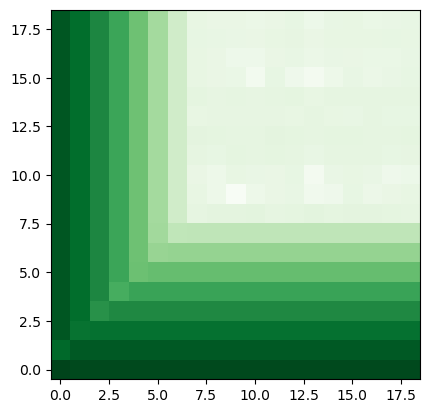

In [62]:
nx=20
ny=20
minx = 1
miny = 1
a = 5
b = 10
c = 10
d = 13
def f(x,y):
    return np.sin(x+y)/np.log(5*y)
fI = 0.07714107601915701
print(kv.quadrature_2d_int(f, nx, ny, a, b, c, d))

xx=np.arange(minx, nx)
yy=np.arange(miny, ny)

X, Y = np.meshgrid(xx, yy)
res = []
for x in xx:
    res_line = []
    for y in yy:
        res_line.append(kv.quadrature_2d_int(f, x, y, a, b, c, d))
    res.append(res_line)
res = np.array(res)
Z = abs(res-fI)
fig, ax = plt.subplots()

ax.imshow(Z, origin='lower', cmap=colormaps['Greens'], norm=colors.LogNorm())
plt.show()
